# Hydrogen Atom

The wavefunction of electron in a hydrogen atom can be written as a product of a radial function and an angular function as follows:{cite}`Sakurai2020`

$$
\psi(\vec{r}) =  R_{n\ell}(r) Y^{m}_{\ell}(\theta,\phi)
$$

where the spherical coordinates $(r,\theta,\phi)$ are used.  The indeces are integers satisfying $n>0$, $ 0 \le \ell \le n-1$, and $-\ell \le m \le \ell$. The radial part of the wave function  is 

$$
R_{n \ell}(r) = \left\{\left(\frac{2}{n a_0}\right)^3 \frac{(n-\ell-1)!}{2n[(n+\ell)!]^3}\right\}^{1/2} e^{-\rho/2} \rho^\ell L^{2\ell+1}_{n+\ell}(\rho)
$$

where $\rho = \frac{2 r}{n a_0}$.  $m_e$ and $a_0$ are the electron mass and the Bohr radius.  $L^{q}_{p}(\rho)$ is the associated Laguerre polynomials are the derivative of the Legendre polynomials defined as $L^q_p(\rho) = \frac{d^q}{d\rho^q} L_p(\rho)$.

The angular part is the spherical harmonics

$$
Y^m_\ell(\theta,\phi) = (-1)^m \sqrt{\frac{2\ell+1}{4\pi} \frac{(\ell-m)!}{(\ell+m)!}} P^m_\ell(\cos\theta) e^{i m \phi}
$$

where $P^m_\ell(\cos\theta)$ is the associated Legendre polynomials defined as 

$$
\begin{eqnarray}
P^m_\ell(\cos\theta) &=& (1-\cos^2\theta)^{m/2} \frac{d^m}{d(\cos\theta)^m} P_\ell(\cos\theta)\\
P^{-m} (\cos\theta) &=& (-1)^m \frac{(\ell-m)!}{(\ell+m)!} P^m_\ell(\cos\theta)
\end{eqnarray}
$$

where $m>0$.

Can you imagine how these functions look like?  It is too complicated even for theoretical physicists.   It is possible to simplify the expression but each set of quantum numbers $(n, \ell, m)$ has a different result.  We want to write a program that plots the wavefunction for any given quantum numbers. 

## Radial Wavefunction

We use `scipy.special` to compute the wavefunction. However, there is an issue.  Mathematicians and physicists define the Laguerre polynomials in different way. (Even within the physics community, different definitions and notations have been used.{cite}`Ballentine2014`  Scipy uses the mathematicians' definition.  The difference is the normalization constant and the lower index.  Here is the relation between them:   $L^{q}_{p}(\rho) = \sqrt{p!}\tilde{L}^{q}_{p-1}(\rho)$ where $\tilde{L}$ is the laguerre polynomial in scipy.  

Using the atomic unit, that is $m_e=\hbar=e=1$, and thus $a_0=1$.  Then, $\rho = 2 r$. We plot $r R_{n \ell}(r)$. We plot $r R_{n\ell}(r)$ since the probability to find particle at $r$ is given by $r^2 |R_{n\ell}(r)|^2 dr$.  (The factor $r^2$ comes from the volume element of the spherical coordinates.)

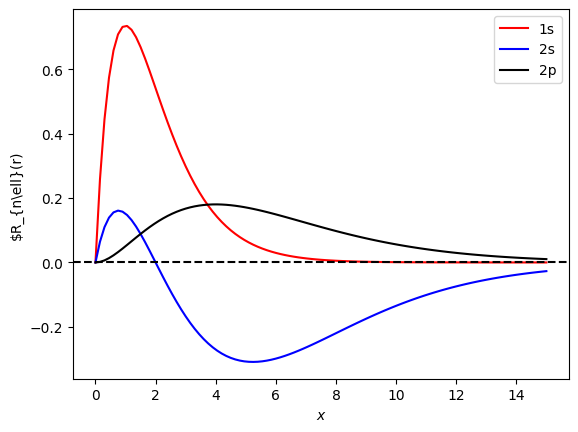

In [1]:
import numpy as np
from scipy.special import assoc_laguerre, factorial
import matplotlib.pyplot as plt

def R(r,n,l):
    c = np.sqrt( (2/n)**3 * factorial(n-l-1) / (2*n) / factorial(n+l)**2 )
    rho = 2*r/n
    return c * rho**l * np.exp(-rho/2) * assoc_laguerre(rho,n-l-1,2*l+1)
    
# generates 101 points between 0 and 15 
r = np.linspace(0,15,101)

# evaluate the function at each point
R10 = r*R(r,1,0)
R20 = r*R(r,2,0)
R21 = r*R(r,2,1)

# plot it using the default options.
plt.plot(r,R10,'-r',label="1s")
plt.plot(r,R20,'-b',label="2s")
plt.plot(r,R21,'-k',label="2p")
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 
plt.xlabel(r"$x$")
plt.ylabel(r"$R_{n\ell}(r)")
plt.legend(loc=0)

The peak position of $r R_{n\ell}(r)|$ corresponds to the most probable location of the electron, which can be roughly interpreted as the "radius" of the orbital.  The 1s state has the smallest radius.  The 2p orbital shows the next smallest radius, smaller than that of the 2s state. We can analytically calculate the expectation value ana the result is $\langle r \rangle = \left(\frac{a_0^2 n^2}{2}\right) \left[ n^2 - \ell(\ell+1)\right]$.  Indeed, for the same $n$, the larger is $\ell$, the smaller is the radius. 

> **Exercise:** Plot the radial wave functions of 3s, 3p, and 3d states.  Check if the 3d state has the smallest radius as the theory predicts.

## Angular Wavefunction

The angular part of the wavefunction is a function of two angles $\theta$ and $\phi$.  However, we are familiar with $e^{-m \phi}$, which represents a traveling wave along a circle.  Therefore, $\frac{1}{\sqrt{2\pi}} e^{i m \phi}$ is excluded.  The associated Legendre polynomial in `scipy.special`  has an unexpected name `lpmv`.  See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lpmv.html).

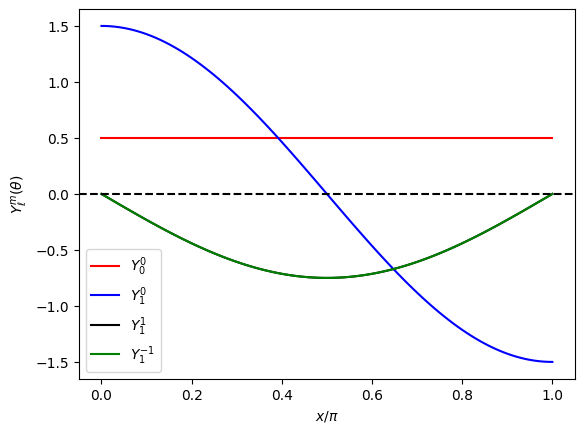

In [2]:
import numpy as np
from scipy.special import lpmv, factorial
import matplotlib.pyplot as plt

def Y(theta,l,m):

    k=abs(m)
    c = (-1)**m * np.sqrt((2*l+1)/2) * np.sqrt(factorial(l-m)/factorial(l+m))
    
    if m < 0:
        c = (-1)**k*factorial(l-k)/factorial(l+k)*c
        
    P = lpmv(k,l,np.cos(theta)) 
    y = c * P
    return c*y
    
# generates 101 points between 0 and 15 
x = np.linspace(0,1,101)
theta = x * np.pi

# evaluate the function at each point
Y00 = Y(theta,0,0)
Y10 = Y(theta,1,0)
Y11p = Y(theta,1,1)
Y11m = Y(theta,1,-1)

# plot it using the default options.
plt.plot(x,Y00,'-r',label=r"$Y^0_0$")
plt.plot(x,Y10,'-b',label=r"$Y^0_1$")
plt.plot(x,Y11p,'-k',label=r"$Y^1_1$")
plt.plot(x,Y11m,'-g',label=r"$Y^{-1}_1$")
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 
plt.xlabel(r"$x/\pi$")
plt.ylabel(r"$Y^m_{\ell}(\theta)$")
plt.legend(loc=0)

The angular function for $\ell=0$ (s state) has no angular dependency.  For $(\ell,m) = (1,0)$, the probability takes the highest value at the north pole ($\theta=0$) and the south pole ($\theta=\pi$), which is often denoted as $p_z$ state.  The other $p$ states $(1,1)$ and $(1,-1)$, are exactly the same and have a maximum at the equator ($\theta = \pi/2$). They corresponds to $p_+$ and $p_-$ states.  Taking into account the circular motion around the $z$ axis described by $e^{\pm i \phi}$, $(1,\pm 1)$ states can be interpreted as a circular motion along the equator, one in the clockwise and the other in the counterclockwise.

___

Last modified on 3/9/2024 by R. Kawai.